# Проект 02. Проверка кредитоспособности клиентов банка.

# Первая часть

# Шаг 1. Откройте таблицу и изучите общую информацию о данных

Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную data. Путь к файлу: /datasets/data.csv.

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

Задание 2. Выведите первые 20 строчек датафрейма data на экран.

In [3]:
display(data.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Задание 3. Выведите основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Шаг 2. Предобработка данных

Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.

In [5]:
print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Задание 5. В двух столбцах есть пропущенные значения. 
Один из них — days_employed. Пропуски в этом столбце вы обработаете на следующем этапе. 
Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. 
На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 
Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.

Предварительный просмотр

In [6]:
print(data.groupby('income_type').agg({'total_income':['mean','median']}))
print('')
print(data.loc[12,'total_income'])    # здесь в изначальном датасете стоял nan - хорошо бы убедится что это так, 
                                      # а потом проверить после подстановки медианы

                  total_income               
                          mean         median
income_type                                  
безработный      131339.751676  131339.751676
в декрете         53829.130729   53829.130729
госслужащий      170898.309923  150447.935283
компаньон        202417.461462  172357.950966
пенсионер        137127.465690  118514.486412
предприниматель  499163.144947  499163.144947
сотрудник        161380.260488  142594.396847
студент           98201.625314   98201.625314

nan


Основное решение и проверка вариант 1

In [7]:
for inc_type in data['income_type'].unique():
    tot_inc_median = data[data['income_type'] == inc_type]['total_income'].median()
    data.loc[(data['income_type'] == inc_type)&(data['total_income'].isna()),'total_income'] = tot_inc_median
    
print(data.isna().sum())              # Проверка: в строке total_income должен быть 0
print()
print(data.loc[12,'total_income'])    # Проверка: строке 12 в столбце 'total_income' стояло NaN, теперь должно быть 
                                      # 118514.486412 - медиана для пенсионеров

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

118514.48641164352


Основное решение и проверка вариант 2

In [8]:
for inc_type in data['income_type'].unique():
    data.loc[(data['income_type'] == inc_type)&(data['total_income'].isna()),'total_income'] = \
    data.loc[(data['income_type'] == inc_type, 'total_income')].median()

print(data.loc[12,'total_income'])    # та же проверка с пенсионером

118514.48641164352


Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода abs().

In [9]:
tot_inc_median = data.groupby('income_type').agg({'total_income':['median']})
print(tot_inc_median)
     
#print(data.loc[12,'total_income'])

                  total_income
                        median
income_type                   
безработный      131339.751676
в декрете         53829.130729
госслужащий      150447.935283
компаньон        172357.950966
пенсионер        118514.486412
предприниматель  499163.144947
сотрудник        142594.396847
студент           98201.625314


In [10]:
for day in data['days_employed'].unique():
    if day <0:
        data['days_employed'] = data['days_employed'].abs()
print(data.loc[:6,'days_employed'])

0      8437.673028
1      4024.803754
2      5623.422610
3      4124.747207
4    340266.072047
5       926.185831
6      2879.202052
Name: days_employed, dtype: float64


Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа в днях из столбца days_employed. У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

In [11]:
print(data.groupby('income_type')['days_employed'].median())

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


Задание 8. Выведите перечень уникальных значений столбца children.

In [12]:
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


Задание 9. В столбце children есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма data.

In [13]:
data = data[(data['children'] !=-1)&(data['children'] !=20)]

print(data['children'].unique())    # Проверка: распечатываем тот же перечень уникальных значений столбца children
                                    # и убеждаемся, что артефактов ("-1" и "+20") - нет.     

[1 0 3 2 4 5]


Задание 10. Ещё раз выведите перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены.

вспомогательная

In [14]:
print( data.groupby('income_type').agg({'days_employed':['mean','median']}) )
print()
print( data.loc[12,'days_employed'] ) # здесь в изначальном датасете стоял nan - хорошо бы убедится что это так, 
                                    # а потом проверить после подстановки медианы

                 days_employed               
                          mean         median
income_type                                  
безработный      366413.652744  366413.652744
в декрете          3296.759962    3296.759962
госслужащий        3403.534603    2689.137274
компаньон          2118.257358    1555.947387
пенсионер        365025.091981  365286.622650
предприниматель     520.848083     520.848083
сотрудник          2323.653522    1572.328285
студент             578.751554     578.751554

nan


основная

In [15]:
for inc_type in data['income_type'].unique():
    days_median = data[(data['income_type'] == inc_type)]['days_employed'].median()
    data.loc[(data['income_type'] == inc_type)&(data['days_employed'].isna()),'days_employed'] = days_median
    
print( data.isna().sum() )              # Проверка: в строке days_employed должен быть 0
print()                                 # Просто пустая строка для разделения
print( data.loc[12,'days_employed'] )   # Проверка: в изначальных данных в этом месте был NaN, должно быть 365286.6226495429

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

365286.6226495429


Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.

In [16]:
print( data.isna().sum() )              # во всех строках должен быть 0

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Задание 13. Замените вещественный тип данных в столбце total_income на целочисленный с помощью метода astype().

In [17]:
data['total_income'] = data['total_income'].astype('int')

print( type(data.loc[0,'total_income']) )  # Проверка: тип должен быть int или 32 или 64

<class 'numpy.int32'>


Задание 14. Обработайте неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.

In [18]:
data['education'] = data['education'].str.lower()

print( data.loc[:10,'education'] )    # Проверка: в исходном датафрейме в первой десятке этого столбца 
                                      # были слова в разных регистрах. Сейчас должны быть тольо в нижнем

0      высшее
1     среднее
2     среднее
3     среднее
4     среднее
5      высшее
6      высшее
7     среднее
8      высшее
9     среднее
10     высшее
Name: education, dtype: object


Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их. Сбрасывать индексы после удаления строк дубликатов с помощью reset_index(drop=True) здесь не требуется

In [19]:
print( data.duplicated().sum() )

71


In [20]:
data = data.drop_duplicates()

print( data.duplicated().sum() )      # Проверка: в результате удаления должно стать 0 дубликатов

0


Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме data столбец total_income_category с категориями:
•	0–30000 — 'E';
•	30001–50000 — 'D';
•	50001–200000 — 'C';
•	200001–1000000 — 'B';
•	1000001 и выше — 'A'.
Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

Сначала сделаем категоризирующую функцию

In [21]:
def categorize_income (income):
    if income > 1000000:
        return 'A'
    if 200000 < income <= 1000000:
        return 'B'
    if 50000 < income <= 200000:
        return 'C'
    if 30000 < income <= 50000:
        return 'D'
    return 'E'

print( categorize_income(17000) )        # Проверка: для каждого диапазона функция должна возвращать 
print( categorize_income(50000) )        # правильное название категории
print( categorize_income(123000) )
print( categorize_income(777000) )
print( categorize_income(1230000) )

E
D
C
B
A


Теперь применим функцию к столбцу 'total_income' и создадим столбец 'total_income_category'

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

print( data.loc[:10, ['total_income','total_income_category']] )  # Проверка: для первых 10 строк посмотреть глазами 
                                                                  # на соответствие категории и суммы в "живом" датафрейме

    total_income total_income_category
0         253875                     B
1         112080                     C
2         145885                     C
3         267628                     B
4         158616                     C
5         255763                     B
6         240525                     B
7         135823                     C
8          95856                     C
9         144425                     C
10        113943                     C


Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца purpose

In [23]:
print( data['purpose'].value_counts() )

purpose
свадьба                                   790
на проведение свадьбы                     763
сыграть свадьбу                           760
операции с недвижимостью                  672
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   649
операции с жильем                         647
операции с коммерческой недвижимостью     645
жилье                                     641
покупка жилья                             640
покупка жилья для семьи                   637
недвижимость                              631
строительство собственной недвижимости    628
операции со своей недвижимостью           623
строительство жилой недвижимости          620
строительство недвижимости                619
покупка своего жилья                      619
покупка недвижимости                      616
ремонт жилью                              604
покупка жилой недвижимости                602
на покупку своего автомобиля              504
заняться высшим образовани

Задание 18. Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, куда войдут следующие категории:
•	'операции с автомобилем',
•	'операции с недвижимостью',
•	'проведение свадьбы',
•	'получение образования'.
Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.
Используйте собственную функцию с именем categorize_purpose() и метод apply(). Изучите данные в столбце purpose и определите, какие подстроки помогут вам правильно определить категорию.


Сначала сделаем функцию

In [24]:
def categorize_purpose(purp):
    if 'автомоб'in purp :
        return 'операции с автомобилем'
    if ('недвижимост'in purp)|('жиль' in purp):
        return 'операции с недвижимостью'
    if 'свадьб' in purp:
        return 'проведение свадьбы'
    return 'получение образования'

Теперь применим функцию к столбцу 'purpose' и  создадим столбец 'purpose_category'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

print( data.loc[:10, ['purpose','purpose_category']] )  # Проверка: для первых 10 строк посмотреть глазами 
                                                        # на соответствие категории и собственно цели в "живом" датафрейме

                       purpose          purpose_category
0                покупка жилья  операции с недвижимостью
1      приобретение автомобиля    операции с автомобилем
2                покупка жилья  операции с недвижимостью
3   дополнительное образование     получение образования
4              сыграть свадьбу        проведение свадьбы
5                покупка жилья  операции с недвижимостью
6            операции с жильем  операции с недвижимостью
7                  образование     получение образования
8        на проведение свадьбы        проведение свадьбы
9      покупка жилья для семьи  операции с недвижимостью
10        покупка недвижимости  операции с недвижимостью


# Вторая часть

# Шаг 3. Исследуйте данные и ответьте на вопросы

Дисклеймер: Записывал свои соображения довольно подробно, чтобы было понятно что откуда и почему. 
            Заранее прошу прощения за возможное многословие.

Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [26]:
import pandas as pd

data = pd.read_csv('data.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [28]:
display(data.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [29]:
display(data.tail(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21506,1,-1556.249906,33,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,145541.993320,свадьба
21507,1,-79.832064,32,среднее,1,гражданский брак,1,F,госслужащий,0,98180.279152,сделка с подержанным автомобилем
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля
21511,0,-612.569129,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068.472941,покупка жилья для сдачи
21512,0,-165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301.457769,получение дополнительного образования
21513,0,-1166.216789,35,среднее,1,женат / замужем,0,F,сотрудник,0,250986.142309,покупка жилья
21514,0,-280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988.407188,строительство недвижимости


В начале первой части делали взгляд на столбец "children": 
по нему есть четкое разъяснение в описании, что это именно количество детей,
по data.info() видно, что что пропусков данных нет (значимых строк 21525 как и в большинстве остальных столбцов), 
тип данных int64 (значит, что похоже действительно там количество),
по data.head видим, что в первой двадцатке есть не только нули, но и 1 , 2 и даже 3, что похоже на правду.   

В задании №9 первой части сделал очистку от артефактов (удаление строчек, где фигурировали -1 и 20 детей)

In [30]:
data = data[(data['children'] !=-1)&(data['children'] !=20)]
print(data['children'].unique())

[1 0 3 2 4 5]


получили на входе корректный датасет data (без нескольких заведомо некорректных строк) и 
6 категорий клиентов (по количеству детей 0,1,2,3,4 и 5) по которым можно попробовать проанализировать.

Аналогичный взгляд сделаем на столбец "debt" в котором судя по описанию содержатся данные о том, имел ли клиент задолженность по возврату кредитов.
В связи с отсутствием прямого пазъяснения - предложим гипотезу, что значение 0 если задолженности не было и 1 - если была.
По data.head видим, что данные представлены в бинарном виде . 
По data.info() видим, что пропусков данных нет, тип данных int64 что нормально - можно считать.
Для начала есть смысл посмотреть сколько вообще клиентов имело/не имело задолженности. 
Заодно проверим 
правильно ли понимание, что 0 - отсутствие задолженности, 1- ее наличие: единиц должно быть в разы меньше (иначе банк странный со странной клиентурой),
проверим достаточно ли много людей в категории 0 и 1, чтобы можно было "растащить" их на 6 подкатегорий

In [31]:
data['debt'].value_counts()

debt
0    19670
1     1732
Name: count, dtype: int64

In [32]:
data['debt'].value_counts(normalize = True)

debt
0    0.919073
1    0.080927
Name: proportion, dtype: float64

Ремарка: считаем очевидным, что функция "mean" для бинарного столбца дает именно долю единиц т.е. результат тот же, что и при применении "value_counts(normalize = True)" для 1  =  0.080927. Далее будем применять именно ее. 

In [33]:
data['debt'].mean()

0.0809270161667134

Получается, что:
1. Действительно 0 - отсутствие задолженности, 1- ее наличие, клиентов с задолженностью только 8%, что похоже на правду,
2. При этом количество клиентов с задолженностью все-таки 1741, что в общем довольно много, чтобы считать выборку репрезентативной и пробовать заполнить ею 6 категорий по количеству детей.

Значит в основном и будем анализировать эту часть.(если в последствии увидим, что в какой-то группе окажется совсем мало людей - нужно будет объединять)

In [34]:
data.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
0,14149,0.075129
1,4818,0.092154
2,2055,0.094404
3,330,0.081818
4,41,0.097561
5,9,0.000000


Получается, что: 
1) Как мы и предполагали в группах с 4 и 5 детьми количество людей моло и значит нерепрезентативно: меньше 2% и 0.5% соответственно (что на уровне и меньше обычной статистической погрешности. Значит вероятность сделать неверный вывод по этим данным высока и данные отдельно рассматривать нельзя. Есть смысл объединить эти группы с группой с 3 детьми - получится вполне репрезентативная объединенная группа.
2) Данные по доле задолженности для групп с 1 и 2 детьми очень близки по значению - это значит, что поведение таких клиентов очень похоже и группы можно объединять.

Объединим (как и думали) в три группы: 0 детей, 1-2 ребенка, 3 и более детей.
Для этого сделаем функцию группировки "children_groupping" по количеству детей, применим ее к столбцу "children" и создадим новый столбец 'children_group' с группами.

In [35]:
def categorize_children (ch_num):
    if ch_num == 0:
        return 'нет детей'
    if ch_num >= 3:
        return 'много детей'
    return '1-2 ребенка'

In [36]:
data['children_group'] = data['children'].apply(categorize_children)

In [37]:
print(data[['children','children_group']])

       children children_group
0             1    1-2 ребенка
1             1    1-2 ребенка
2             0      нет детей
3             3    много детей
4             0      нет детей
...         ...            ...
21520         1    1-2 ребенка
21521         0      нет детей
21522         1    1-2 ребенка
21523         3    много детей
21524         2    1-2 ребенка

[21402 rows x 2 columns]


Колонка создана, данные в ней выглядят корректно. 

Теперь есть смысл вывести распределение по группам, посмотреть есть ли зависимости.

In [46]:
sorted_debt = data.groupby('children_group')['debt'].agg(['count','mean']).sort_values(by='count', ascending=False)
print(sorted_debt)

                count      mean
children_group                 
0 детей         14149  0.075129
1 ребенок        4818  0.092154
2 ребенка        2055  0.094404
3+ детей          380  0.081579


Объединим в 4 группы: 0 детей, 1 ребенок, 2 ребенка, 3 и более детей. 
Для этого переделаем функцию "children_groupping" под новое разбиение, применим ее к столбцу "children" и  создадим новый столбец 'children_group' с группами. Сделаем в одной ячейке.

In [47]:
def categorize_children (ch_num):
    if ch_num == 0:
        return '0 детей'
    if ch_num == 1:
        return '1 ребенок'
    if ch_num == 2:
        return '2 ребенка'
    return '3+ детей'

data['children_group'] = data['children'].apply(categorize_children)

print(data[['children','children_group']])  # Проверка: посмотреть глазами на созданный столбец в "живом" датафрейме

       children children_group
0             1      1 ребенок
1             1      1 ребенок
2             0        0 детей
3             3       3+ детей
4             0        0 детей
...         ...            ...
21520         1      1 ребенок
21521         0        0 детей
21522         1      1 ребенок
21523         3       3+ детей
21524         2      2 ребенка

[21402 rows x 2 columns]


Колонка создана, данные в ней выглядят корректно. 

Теперь посмотрим есть ли зависимости при новом разбиениии по группам.

In [48]:
sorted_debt = data.groupby('children_group')['debt'].agg(['count','mean']).sort_values(by='count', ascending=False)
print(sorted_debt)

                count      mean
children_group                 
0 детей         14149  0.075129
1 ребенок        4818  0.092154
2 ребенка        2055  0.094404
3+ детей          380  0.081579


Для наглядности представим данные по доле клиентов с задолженностью в графическом виде.

<Axes: title={'center': 'Зависимость долга от количества детей '}, xlabel='children_group'>

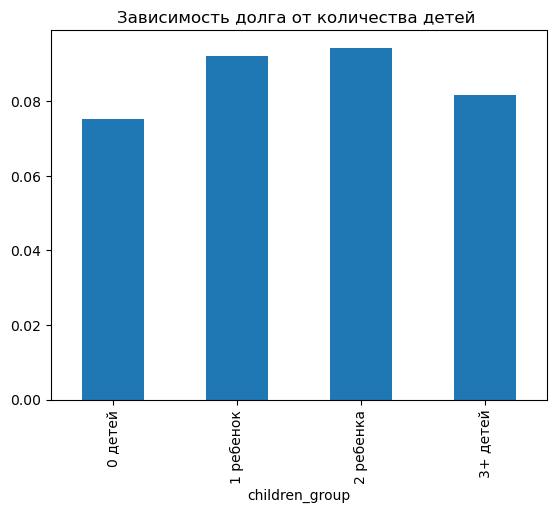

In [49]:
sorted_debt['mean'].plot(kind='bar', title='Зависимость долга от количества детей ')

В результате нового разбиения (разделения групп с 1 и 2 детьми на отдельные группы) никаких новых закономерностей не просматривается: 
группа с 2 детьми демонстрирует незначительно большую (9.45% против 9.24%) долю клиентов с задолженностью, 
но в целом группы с 1 и с 2 детьми ведут себя примерно одинаково, отличаясь от других групп куда более значительно, нежели между собой.

Выводы:
    
    Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%.
    Выявлена крайне слабая зависимость этой доли клиентов от количества детей в семье:
        наибольший процент клиентов с задолженностью - у клиентов с 1 или 2 детьми (9.3%) , 
        наименьший - у бездетных клиентов (7.5%)
    Эта разница вполне объяснима на бытовом уровне: финансовая нагрузка на бюджет бездетной семьи существенно меньше, чем нагрузка на семью с детьми.
    Однако группа клиентов с 3 и более детьми в данной выборке выбивается из этой логики: процент задолженности в ней = 8.2%, что меньше, чем для клиентов с 1-2 детьми.
        По всей видимости объясняется это общей малочисленностью данной группы (ок. 1.7%) и более ответственным подходом этих немногих к подаче заявки на кредит.
    
    Следует учитывать, что разброс значений по категориям составляет около +-1%, что уже на уровне статистической погрешности для такого рода исследований.
    Поэтому учитывать найденную слабую зависимость при принятии решений и выработке шагов на ее основе нет смысла.
   
        

Взглянем на всякий случай еще на один параметр: на разбивку по полу (может что интересное найдем)

In [50]:
data.pivot_table(index='children_group', columns='gender', values='debt',aggfunc=['count','mean'])

count                   mean               
gender               F       M  XNA         F         M  XNA
children_group                                              
0 детей         9570.0  4578.0  1.0  0.061860  0.102883  0.0
1 ребенок       3094.0  1724.0  NaN  0.079186  0.115429  NaN
2 ребенка       1259.0   796.0  NaN  0.106434  0.075377  NaN
3+ детей         231.0   149.0  NaN  0.077922  0.087248  NaN

В данных похоже есть какой-то мусор: у кого-то наверное пол указан с ошибкой. Но удалять сейчас смысла нет - на картину это не влияет.

Возможно стоит иметь ввиду в дальнейшем при принятии решений следующие моменты:  
1. Женщины берут кредит гораздо чаще (почти в 2 раза), чем мужчины, а задолженность допускают гораздо реже.  
2. При этому с появлением 1-2 детей у мужчин показатель задолженности меняется не сильно, а у женщин существенно растет (с 6.2% при отсутствии детей до 8.7% при 1-2 детях)

Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?

Импортировать pandas и выводить датафрейм data нет смысла: в предыдущей задаче мы это проделывали и по ходу выполнения анализа датафрейм не меняли.
Поэтому предполагаем (пока и если не увидим вдруг обратное), что имеем на входе корректный датафрейм

Смотрим столбец "debt"

In [51]:
print(data['debt'].value_counts())
print()
print(data['debt'].mean())

debt
0    19670
1     1732
Name: count, dtype: int64

0.0809270161667134


В столбце "debt" все то же: 
0 - отсутствие задолженности, 1- ее наличие,  
пропусков данных нет, тип данных int64 - можно считать,  
количество людей с задолженностью 1732, что достаточно для репрезентативного анализа,  
доля клиентов с задолженностью 8%

Относительно столбцов, соответствующих семейному положению:  
По data.info() видим, что столбцов, отражающих семейное положение два - "family_status" и "family_status_id",  оба они полны, с одинаковым количеством значений ( по всей видимости "family_status_id" просто создан как классификатор из "family_status").  
По data.head  и data.tail видим, что данные представлены единообразно, ошибок нигде не видно.  
Будем ориентироваться на столбец "family_status" как более информативный (если что-то не будет соответствовать - будем "подключать"  "family_status_id").

Посмотрим какое разбиение по семейному положению (сколько групп) и как по ним распределено количество клиентов с задолженностью (если увидим, что в какой-то группе окажется совсем мало людей - нужно будет объединять).

In [52]:
data.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
Не женат / не замужем,2799,0.097535
в разводе,1189,0.070648
вдовец / вдова,952,0.066176
гражданский брак,4160,0.092548
женат / замужем,12302,0.075354


Видим что:   
    Групп 5, распределение по группам на взгляд соответствует реальности, количество человек в каждой из групп репрезентативно. 
    Возможно был бы смысл объединить группы "в разводе" и "вдовец / вдова" в связи с их немногочисленностью относительно остальных, но можно этого и не делать - получается все равно достаточно репрезентативно.   

Для удобства отсортируем данные по доле клиентов с задолженностью и представим их в графическом виде.

In [53]:
sorted_debt_fam = data.groupby('family_status')['debt'].agg(['count','mean']).sort_values(by='count', ascending=False)
print(sorted_debt_fam)

                       count      mean
family_status                         
женат / замужем        12302  0.075354
гражданский брак        4160  0.092548
Не женат / не замужем   2799  0.097535
в разводе               1189  0.070648
вдовец / вдова           952  0.066176


<Axes: title={'center': 'Зависимость от семейного положения'}, xlabel='family_status', ylabel='mean'>

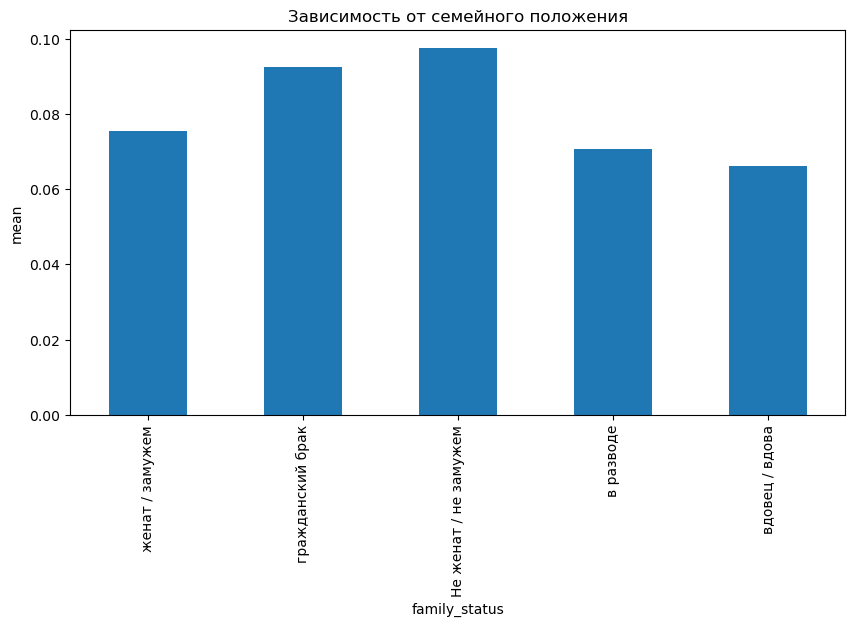

In [54]:
sorted_debt_fam['mean'].plot(kind='bar', title= 'Зависимость от семейного положения', xlabel='family_status', ylabel= 'mean', figsize=(10,5))

<Axes: title={'center': 'Зависимость от семейного положения'}, xlabel='family_status', ylabel='mean'>

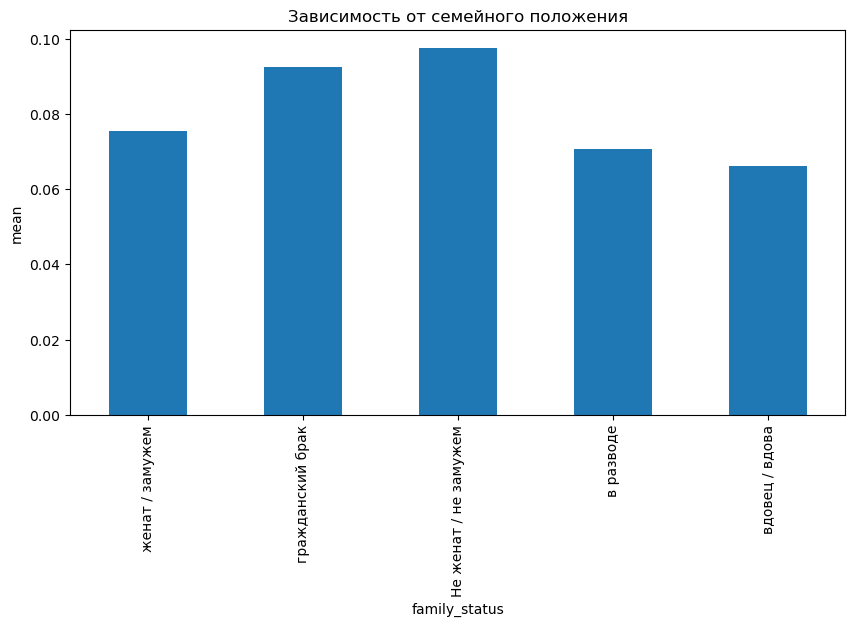

In [56]:
sorted_debt_fam['mean'].plot(kind='bar', title= 'Зависимость от семейного положения', \
                             xlabel='family_status', ylabel= 'mean', figsize=(10,5))

Выводы:

Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%.

Выявлены следующие зависимости этой доли от семейного положения клиента:

наибольший процент клиентов с задолженностью - у неженатых/незамужних клиентов  - 9.8% , 

наименьший - у клиентов, находящихся в разводе и вдовых - 7.0% и 6.6% соответственно,
женатые/замужние клиенты представляют серединное большинство - процент задолженности в этой категории - 7.5%, что гораздо ближе к категории "разведенных", чем к категории "неженатых".
    
Эта разница может быть объяснена тем, что женатые люди, проходя через разные жизненные ситуации приучаются нести ответственность за свои поступки (что в еще большей степени должно быть свойственно разведенным и вдовцам), нежели люди неженатые. 

Наиболее интересная группа - клиенты, состоящие вгражданском браке: в данной выборке их в 1.5 раза болше, чем неженатых и с точки зрения задолженности их поведение гораздо ближе к неженатым, чем к женатым: процент клиентов с задолженностью в этой группе - 9.3%, то есть всего на 0.5% меньше чем у неженатых и аж на 1.8% больше, чем у официально семейных. 
    По всей видимости объясняется это тем, что люди вступая в гражданский брак не меняют свою психологию и их чуство ответственности за свои поступки остается на уровне неженатых. Возможно здесь потребуется более детальное исследование данной категории.
    
Однако общий вывод таков, что разброс доли клиентов с кредитной задолженностью по разным категориям в зависимости от семейного положения (от 6.6% до 9.8%) хоть и является заметным, но не выходит за рамки, которые могут существенно повлиять на решение о предоставлении кредита или заставить банк поменять условия предоставления кредита для какой-либо из категорий.


Взглянем на всякий случай еще на то, как будет вести себя доля клиентов с кредитной задолженностью в разбивке не только по семейному положению, но и по количеству детей (может что интересное увидим)

In [57]:
data.pivot_table(index= 'family_status', columns= 'children_group', values= 'debt',aggfunc=[ 'count', 'mean'])

count                                   mean  \
children_group        0 детей 1 ребенок 2 ребенка 3+ детей   0 детей   
family_status                                                          
Не женат / не замужем    2265       449        75       10  0.092715   
в разводе                 784       312        81       12  0.070153   
вдовец / вдова            848        77        20        7  0.062500   
гражданский брак         2752       998       344       66  0.083212   
женат / замужем          7500      2982      1535      285  0.068800   

                                                     
children_group        1 ребенок 2 ребенка  3+ детей  
family_status                                        
Не женат / не замужем  0.115813  0.120000  0.200000  
в разводе              0.067308  0.086420  0.083333  
вдовец / вдова         0.090909  0.150000  0.000000  
гражданский брак       0.118236  0.087209  0.121212  
женат / замужем        0.082495  0.094463  0.070175

Нужно отметить два момента:  
    1. С появлением детей разница в доле людей с задолженностью среди неженатых людей растет сильнее, чем среди женатых/замужних - 3.0% разницы при 1-2 детях и 2.4% у бездетных. Это логично, поскольку очевидно, что финансовая нагрузка на бюджет семьи с двумя родителями все же меньше, чем нагрузка на одинокого родителя с детьми.  
    2. С появлением детей финансовое поведение людей, состоящих в гражданском браке все больше становится похоже на поведение неженатых (разница в задолженности 0.6% при 1-2 детях против 1.0% при отсутствии детей) и все дальше от женатых (разница в 2.3% при 1-2 детях  против 1.5% при отсутствии детей).

Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Импортировать pandas и выводить датафрейм data снова не будем.

В нашем основном столбце "debt" все по прежнему:
0 - отсутствие задолженности, 1- ее наличие,
пропусков данных нет, тип данных int64 - можно считать,
количество людей с задолженностью 1732, что достаточно для репрезентативного анализа,
доля клиентов с задолженностью 8%    

Относительно уровня ежемесячного дохода ( по результатам просмотра data.head и data.tail и data.info ):
Данные об уровне дохода находятся в столбце "total_income", однако  
в изначальном датафрейме эти данные имеют значительное количество пропусков (2174 строки или 10% от всех во фрейме)  
и эти данные в датафрейме никак не структурированы ( доход в столбце "total_income" показан как есть, а столбца с диапазонами во фрейме нет)   
В задачах №5 и №16 из первой части мы как раз заполняли пропуски в этом столбце медианными значениями по категориям занятости и создали 5 диапазонов уровня дохода:	0–30000; 30001–50000; 50001–200000; 200001–1000000 и свыше 1000000.
Повторим эти действия сейчас и заодно повторим задание 13 - преобразуем тип данных в столбце из float в int чтобы не смотреть на длинные "хвосты", которые не нужны для анализа.

Заполняем пробелы медианными значениями по типам занятости

In [58]:
for inc_type in data['income_type'].unique():
    data.loc[(data['income_type'] == inc_type)&(data['total_income'].isna()),'total_income'] = \
    data.loc[(data['income_type'] == inc_type, 'total_income')].median()
    
print(data.loc[12,'total_income']) # Проверка: строке 12 в столбце 'total_income' стояло NaN, теперь должно быть 
                                      # 118514.486412 - медиана для пенсионеров

118480.8374078531


Преобразуем тип данных в столбце из float в int 

In [59]:
data['total_income'] = data['total_income'].astype('int')

print( type(data.loc[0,'total_income']) )  # Проверка: тип должен быть int или 32 или 64

<class 'numpy.int32'>


Создаём  диапазоны уровня дохода:(0–30000; 30001–50000; 50001–200000; 200001–1000000 и свыше 1000000)

Сначала создаем функцию с диапазонами 

In [60]:
def categorize_income (income):
    if income > 1000000:
        return '5. больше 1М'
    if 200000 < income <= 1000000:
        return '4. от 200К до 1М'
    if 50000 < income <= 200000:
        return '3. от 50К до 200К'
    if 30000 < income <= 50000:
        return '2. от 30К до 50К'
    return '1. меньше 30К'

print( categorize_income(17000) )        # Проверка: для каждого диапазона функция должна возвращать 
print( categorize_income(50000) )        # правильное название категории
print( categorize_income(123000) )
print( categorize_income(777000) )
print( categorize_income(1230000) )

1. меньше 30К
2. от 30К до 50К
3. от 50К до 200К
4. от 200К до 1М
5. больше 1М


Теперь применяем функцию к столбцу "total_income" 

In [61]:
data['income_bin'] = data['total_income'].apply(categorize_income)

print( data.loc[:5, ['total_income','income_bin']] )      # Проверка: для первых 5 строк посмотреть глазами 
                                                          # на соответствие категории и суммы в "живом" датафрейме

   total_income         income_bin
0        253875   4. от 200К до 1М
1        112080  3. от 50К до 200К
2        145885  3. от 50К до 200К
3        267628   4. от 200К до 1М
4        158616  3. от 50К до 200К
5        255763   4. от 200К до 1М


В результате столбец создали, данные в нем выглядят корректно.
То есть имеем референтный столбец с 5-ю диапазонами по доходу, к которому будем "прикладывать" наш основной столбец "debt" и смотреть есть ли зависимости

Для удобства отсортируем данные по группам клиентов.

In [62]:
sorted_debt_inc = data.groupby('income_bin')['debt'].agg(['count','mean']).sort_values(by='income_bin', ascending=True)
print(sorted_debt_inc)

                   count      mean
income_bin                        
1. меньше 30К         22  0.090909
2. от 30К до 50К     349  0.060172
3. от 50К до 200К  15992  0.084605
4. от 200К до 1М    5014  0.070602
5. больше 1М          25  0.080000


Видно, что диапазоны, на которые мы делали разбивку в первой части - не подходят по эту задачу потому что:
в крайних группах 1 и 5 слишком мало представителей для того, чтобы делать более-менее уверенные выводы по этим группам,
в центральой группе 3 - наоборот слишком много народа и мы рискуем слишком "усреднить" наше суждение о ней и не заметить какие-нибудь закономерности.

Выводы:

Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%. 

Выявлены следующие зависимости этой доли от доходов клиента: 

1. Наибольший процент клиентов с задолженностью - у клиентов с доходом до 30 тысяч рублей в месяц - 9.0% что на 0.9% выше среднего и на целых 3% выше "соседней" категории.
Это может свидетельствовать о том, что при таком низком уровне доходов денег часто не хватает даже на самое необходимое (еду и одежду) и в бюджете (включая статью возврат кредита) возникают "дыры"

2. Наибольший процент клиентов с задолженностью - у клиентов с доходом от 30 до 50 тысяч рублей в месяц - 6.0%, резко снижаясь по отношению к категории "меньше 30 тысяч". 
На мой взгляд такое резкое "улучшение" укладывается в следующую логику: людт живут небогато и привыкли тщательно считать деньги и планировать расходы ( в том числе и на статью "возврат кредита"), однако "дыр" в критических статьях бюджета не возникает и средвтва на погашение кредита находятся. Также весьма вероятно, что эта категория людей более ответственно и рассчетливо подходит к самому решению взять кредит (предварительно все хорошенько рассчитав). Кроме того, вполне возможно, что люди из этой категории - это представители профессий и специальностей не высоко оплачиваемых, но стабильных, а это позволяет жестко придерживаться намеченного финансового плана (здесь при наличии заинтересованности потребуется дополнительное исследование)

3. Две следующие самые многочисленные категории - с доходами от 50 до 200 тысяч рублей в месяц и от 200 тысяч до 1 миллиона имеют процент клиентов с задолженностью существенно выше, чем для категории с доходом от 30 до 50 тысяч рублей  (8.4% и 7.0% соответственно против 6.0%). Все же эти показатели заметно ниже ( на 0.6% и 2% соответственно), чем для категории от до 30 тысяч рублей ежемесячного дохода. При этом максимум задолженности приходится на группу "от 50 до 200 тысяч рублей" (до упомянутых уже 8.4%) и далее серьезно спадает при превышении дохода в 200 тысяч до 7.0%. 
Вполне возможно, что объяснение того факта, что максимум здесь приходится на группу 50-200 тысяч рублей и резко отличается от соседних групп лежит в плоскости перехода людей к другому стилю жизни: по всей видимости представители этой категории уже не считают каждую копейку, начинает преобладать ощущение "могу себе позволить" и начинают увеличиваться масштабы желаний. Это приводит к нежеланию планировать финансовую перспективу и неспособности ее соблюдать, что в сочетании с возможной нестабильностью с доходами (это гипотеза и здесь возможно нужна будет дополнительная проверка) приводит к росту задолженности.
Снижение же задолженности в категории 200 тысяч - 1 миллион рублей может говорить о том, что при таком уровне дохода представители этой группы уже действительно "могут себе позволить" и выплата кредита занимает менее существенную долю в их бюджете.

3. В категории с доходами более 1 миллиона рублей в месяц уровень задолженности возрастает до 8.0%, то есть на 1% по отношению к группе 200 тысяч - 1М.
По всей видимости это свидетельствует о том, что для представителей этой группы наличие кредита (и соответственно - необходимости выплат по нему) не является приоритетом. В связи с чрезмерной занятостью людей более важными для них делами о выплате кредита похоже банально забывают.

Следует также обратить внимание на тот факт, что количество представителей клиентов в двух крайних категориях ("меньше 30К" и "больше 1М") слишком мало, чтобы рассматривать результаты как надежные. При необходимости есть смысл посмотреть на эти категории более внимательно на больших по численности выборках. 


Сделаем пересортировку на другие диапазоны: 
    •	0–50000; 
    •	50001–100000; 
    •	100001–150000; 
    •	150001–200000; 
    •	200001–300000; 
    •	300001–500000 
    •	и свыше 500000.

Снова функцию с диапазонами и применяем ее к столбцу "total_income"

In [63]:
def categorize_income (income):
    if income > 500000:
        return '7. больше 500К'
    if 300000 < income <= 500000:
        return '6. от 300К до 500К'
    if 200000 < income <= 300000:
        return '4. от 200К до 300К'
    if 150000 < income <= 200000:
        return '4. от 150К до 200К'
    if 100000 < income <= 150000:
        return '3. от 100К до 150К'
    if 50000 < income <= 100000:
        return '2. от 50К до 100К'
    return '1. меньше 50К'


data['income_bin'] = data['total_income'].apply(categorize_income)

Отсортируем данные по группам клиентов и выведем для анализа задолженности (т.е столбца "debt").

In [64]:
data['income_bin_q'] = pd.qcut(data['total_income'],7)
sorted_debt_inc = data.groupby('income_bin_q')['debt'].agg(['count','mean']).sort_values(by='income_bin_q', ascending=True)
print(sorted_debt_inc)

                          count      mean
income_bin_q                             
(20666.999, 87411.857]     3058  0.076521
(87411.857, 113721.143]    3057  0.086032
(113721.143, 137469.714]   3057  0.085378
(137469.714, 155008.429]   3058  0.086004
(155008.429, 184187.714]   3057  0.082761
(184187.714, 241749.143]   3057  0.079817
(241749.143, 2265604.0]    3058  0.069980


Для удобства представим эти же результаты в графическом виде.

<Axes: title={'center': 'Зависимость от уровня дохода'}, xlabel='income_bin_q', ylabel='mean'>

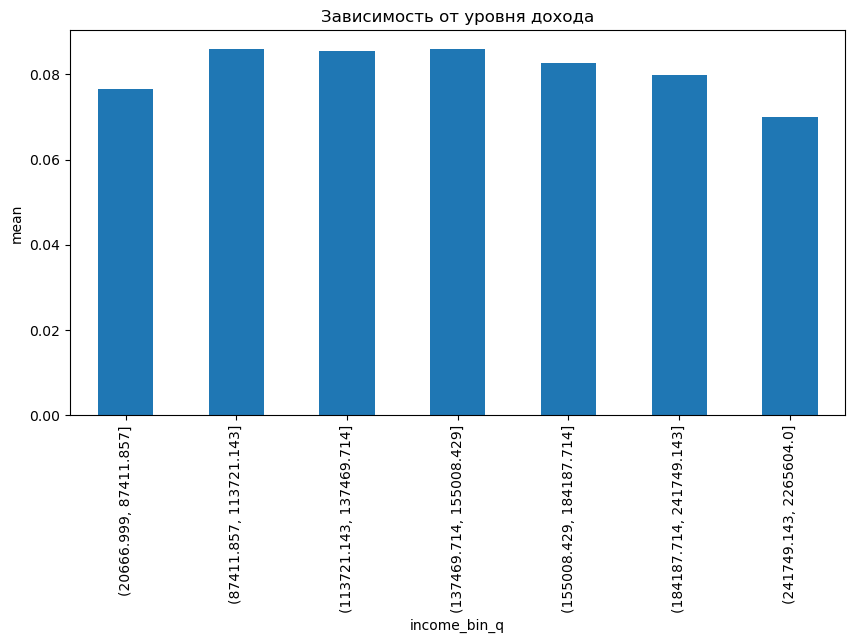

In [65]:
sorted_debt_inc['mean'].plot(kind='bar', title= 'Зависимость от уровня дохода', xlabel='income_bin_q', ylabel= 'mean', figsize=(10,5))

Выводы:

Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%. 

Выявлены следующие зависимости этой доли от доходов клиента: 

1. Наименьший процент клиентов с задолженностью - у клиентов с доходом до 50 тысяч рублей в месяц - 6.2%. 
Это с одной стороны может быть и неожиданно (все таки доходы достаточно низкие и приходится "сводить концы с концами"), но с другой - укладывается в следующую логику: людт живут небогато и привыкли тщательно считать деньги и планировать расходы ( в том числе и на статью "возврат кредита"). Также весьма вероятно, что эта категория людей более ответственно и рассчетливо подходит к самому решению взять кредит (предварительно все хорошенько рассчитав). Кроме того, вполне возможно, что люди из этой категории - это представители профессий и специальностей не высоко оплачиваемых, но стабильных, а это позволяет жестко придерживаться намеченного финансового плана (здесь при наличии заинтересованности потребуется дополнительное исследование). 

2. Наибольший процент клиентов с задолженностью - у клиентов с доходом от 50 до 200 тысяч рублей в месяц, резко возрастая по отношению к кактегории "меньше 50 тысяч" - на 2 и более %. Максимума показатель задолженности достигает для группы с доходом от 50 до 200 тысяч рублей в месяц - 8.6% (на 2.3% выше, чем в категории "меньше 50 тысяч") и затем несколько снижается (для группы 150-200 тысяч), оставаясь при этом выше среднего - 8.4%.
Вполне возможно, что объяснение этому лежит в плоскости перехода людей к другому стилю жизни: по всей видимости представители этой категории уже не считают каждую копейку, начинает преобладать ощущение "могу себе позволить" и начинают увеличиваться масштабы желаний. Это приводит к нежеланию планировать финансовую перспективу и неспособности ее соблюдать, что в сочетании с возможной нестабильностью с доходами (это гипотеза и здесь возможно нужна будет дополнительная проверка) приводит к росту задолженности.

3. Три следующие три категории - с доходами 200 тысяч рублей в месяц и более имеют процент клиентов с задолженностью несколько выше, чем для категории с доходом до 50 тысяч рублей  (7.3% в максимуме против 6.2%). Все же эти показатели существенно ниже, чем для категорий от 50 до 200 тысяч рублей ежемесячного дохода (7.0-7.3% против 8.1-8.6%). При этом максимум в задолженности приходится на группу "от 300 до 500 тысяч рублей" (до упомянутых уже 7.3%) и далее спадает при превышении дохода в 500 тысяч до 6.3%. В общем - эти группы демонстрируют уровень задолженности ниже среднего по выборке.
Вполне возможно, что такое поведение показателей задолженности свидетельствует о том, что эти группы уже действительно "могут себе позволить" и выплата кредита занимает менее существенную долю в их бюджете. Наличие локального максимума не на стыке с предыдущей категорией, на "в середине" - для группы 300-500 тысяч может свидетельствовать о наличии на этом уровне доходов еще одного "фазового перехода" с ростом потребностей и желаний, либо же чрезмерной занятостью людей из этой группы (когда о выплате кредита банально забываешь в суматохе важных дел).



Возможно есть смысл посмотреть как доля задолженности зависит от дохода в сочетании например с типом занятости: есть подозрение, что наемные работники будут иметь большую задолженность по сравнению с остальными (пенсионерами например)

In [66]:
data.pivot_table(index= 'income_type', columns= 'income_bin', values= 'debt',aggfunc=[ 'count', 'mean'])

count                                       \
income_bin      1. меньше 50К 2. от 50К до 100К 3. от 100К до 150К   
income_type                                                          
безработный               NaN               1.0                NaN   
в декрете                 NaN               1.0                NaN   
госслужащий              25.0             264.0              364.0   
компаньон                26.0             553.0             1161.0   
пенсионер               179.0            1102.0             1424.0   
предприниматель           NaN               NaN                NaN   
сотрудник               141.0            2151.0             4223.0   
студент                   NaN               1.0                NaN   

                                                                          \
income_bin      4. от 150К до 200К 4. от 200К до 300К 6. от 300К до 500К   
income_type                                                                
безработный                    NaN                1.0                NaN   
в декрете                      NaN                NaN                NaN   
госслужащий                  434.0              251.0              101.0   
компаньон                   1566.0             1124.0              508.0   
пенсионер                    582.0              424.0              109.0   
предприниматель                NaN                NaN                2.0   
сотрудник                   2165.0             1765.0              532.0   
студент                        NaN                NaN                NaN   

                                        mean                    \
income_bin      7. больше 500К 1. меньше 50К 2. от 50К до 100К   
income_type                                                      
безработный                NaN           NaN          1.000000   
в декрете                  NaN           NaN          1.000000   
госслужащий               14.0      0.040000          0.075758   
компаньон                116.0      0.038462          0.083183   
пенсионер                 19.0      0.050279          0.047187   
предприниматель            NaN           NaN               NaN   
сотрудник                 73.0      0.085106          0.098094   
студент                    NaN           NaN          0.000000   

                                                                          \
income_bin      3. от 100К до 150К 4. от 150К до 200К 4. от 200К до 300К   
income_type                                                                
безработный                    NaN                NaN           0.000000   
в декрете                      NaN                NaN                NaN   
госслужащий               0.068681           0.050691           0.063745   
компаньон                 0.080103           0.078544           0.062278   
пенсионер                 0.062500           0.060137           0.061321   
предприниматель                NaN                NaN                NaN   
сотрудник                 0.097561           0.103002           0.078187   
студент                        NaN                NaN                NaN   

                                                   
income_bin      6. от 300К до 500К 7. больше 500К  
income_type                                        
безработный                    NaN            NaN  
в декрете                      NaN            NaN  
госслужащий               0.019802       0.000000  
компаньон                 0.064961       0.068966  
пенсионер                 0.045872       0.000000  
предприниматель           0.000000            NaN  
сотрудник                 0.097744       0.082192  
студент                        NaN            NaN

Навскидку видно, что основной вклад по задолженности (особенно в том самом диапазоне 50-200 тысяч) вносят сотрудники (т.е. наемные работники негосударственного сектора) и т.н. компаньоны (т.е. как я понимаю люди, работающие с индивидуальными предпринимателями, в мелких фирмешках или стартапах и которым "обещали долю если все это взлетит"). Уровень задолженности у госслужащих и пенсионеров (остальные категории не существенны) - заметно ниже.
На мой взгляд становится понятно, что стабильность работы и предсказуемость доходов является одним из основных факторов в прогнозировании своей способности выплачивать кредит.

Задание 22. Как разные цели кредита влияют на его возврат в срок?

Импортировать pandas и выводить датафрейм data по прежнему не будем.

В нашем основном столбце "debt" все по прежнему:
0 - отсутствие задолженности, 1- ее наличие,
пропусков данных нет, тип данных int64 - можно считать,
количество людей с задолженностью 1732, что достаточно для репрезентативного анализа,
доля клиентов с задолженностью 8%    

Относительно целей кредита ( по результатам просмотра data.head и data.tail и data.info ):
Данные об уровне дохода находятся в столбце "purpose", 
пропусков данных нет (значимых строк 21525 как и в большинстве остальных столбцов), тип данных object, что нормально 

В задаче №18 из первой части мы создавали функцию categorize_purpose():, которая разбивала заявленные цели кредита на 4 категории, и создавали столбец в датафрейме с этими категориями - "purpose_category".

Повторим это здесь

In [67]:
def categorize_purpose(purpose):
    if 'автомоб'in purpose :
        return 'на автомобиль'
    if ('недвижимост'in purpose)|('жиль' in purpose):
        return 'на недвижимость'
    if 'свадьб' in purpose:
        return 'на свадьбу'
    return 'на образование'


data['purpose_category'] = data['purpose'].apply(categorize_purpose)
print( data.loc[:5, ['purpose','purpose_category']] )      # Проверка: для первых 5 строк посмотреть глазами 
                                                           # на соответствие категории и собственно цели в "живом" датафрейме

                      purpose purpose_category
0               покупка жилья  на недвижимость
1     приобретение автомобиля    на автомобиль
2               покупка жилья  на недвижимость
3  дополнительное образование   на образование
4             сыграть свадьбу       на свадьбу
5               покупка жилья  на недвижимость


Получили столбец "purpose_category" с четырьмя группами, пригодными для анализа.
Далее будем анализировать параметр задолженности из столбца "debt" в разбивке по категориям из этого столбца 

In [68]:
sorted_debt_purp = data.groupby('purpose_category')['debt'].agg(['count','mean']).sort_values(by='count', ascending=False)
print(sorted_debt_purp)

                  count      mean
purpose_category                 
на недвижимость   10780  0.072356
на автомобиль      4288  0.093284
на образование     3997  0.092319
на свадьбу         2337  0.078306


И в графическом виде...

<Axes: title={'center': 'Зависимость от цели кредита'}, xlabel='purpose_category', ylabel='mean'>

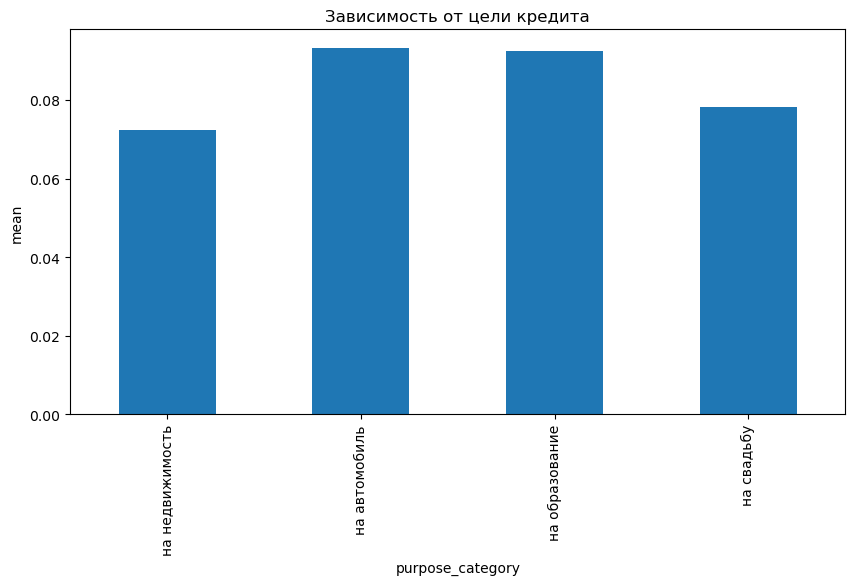

In [69]:
sorted_debt_purp['mean'].plot(kind='bar', title= 'Зависимость от цели кредита', xlabel='purpose_category', ylabel= 'mean', figsize=(10,5))

Выводы:

Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%. 

Выявлены следующие зависимости этой доли от цели заявки на кредит: 

1. Наименьший процент клиентов с задолженностью - среди клиентов, берущих кредит на недвижимость (прежде всего конечно на квартиру) - 7.2%, что ниже среднего на 0.9%.
По всей видимости это связано с высокой значимостью такого кредита для человека/семьи: кватриру покупают нечасто, такие значительные кредиты (как по сумме так и по сроку) тоже берут не часто, соответственно это особое событие (и особое решение) прежде чем принять решение все тщательно обдумывают, советуются и планируют. Как следствие - меньше непредусмотренных фактороров, негативно влияющих на возврат кредита.
 
2. Чуть больший, но вполне сравнимый и достаточно низкий процент задолженности имеют кредиты на свадьбу - 7.8% (на 0.6% выше, чем для операций с недвижимостью).
Вполне вероятно, что причины в этом случае те же: событие значимое, в планировании как правило принимают участие несколько человек, решение все тщательно обдумывают, советуются и планируют. Результат примерно тот же - меньше непредусмотренных фактороров, негативно влияющих на возврат кредита. Отличие доли в большую сторону по ставнению с недвижимостью может быть следствием все-же большего процента спонтанности в случае свадьбы ("молодым очень хотелось уже пожениться поскорее - это же самое главное... вот и не рассчитали свои силы") 

3. Проценты задолженности по кредитам на покупку автомобиля и по кредитам на образование примерно одинаково высоки - 9.3% и 9.2% соответственно (разница с категорией недвижимости составляет аж 2%).
Предположительно это можно объяснить так:
В случае с покупкой автомобиля на мой взгляд играют роль два фактора: автомобили чаще покупают все-таки мужчины (это предположение, возможно потребуется уточнение), а как мы попутно выяснили в процессе решения задания 19 мужчины допускают задолженность гораздо чаще, чем женщины. Кроме того автомобиль сам по себе требует затрат на содержание (заправка, ТО, ремонт, страховки ит.д.), что возможно не в достаточной степени учитывается при принятии решения о кредите.
В случае кредита на образование - возможно играет роль фактор молодости: определенное количество кредитов берется самими молодыми людьми на свое же образование в предположении, что можно будет легко совмещать учебу и работу. На практике совмещение получается гораздо сложнее, в результате трудности (смена или перебои) с работой и задолженность.


Все-таки хочется здесь посмтреть дополнительную разбивку по полу и по возрастным категориям (чтобы подтвердить предположение про молодежь с кредитами на образование и по поводу того, что мужчины берут кредит на авто чаще женщин)

Начнем с пола - это проще.

In [70]:
data.pivot_table(index= 'purpose_category', columns= 'gender', values= 'debt',aggfunc=[ 'count', 'mean'])

count                   mean               
gender                 F       M  XNA         F         M  XNA
purpose_category                                              
на автомобиль     2852.0  1436.0  NaN  0.081346  0.116992  NaN
на недвижимость   7070.0  3709.0  1.0  0.062801  0.090590  0.0
на образование    2657.0  1340.0  NaN  0.077531  0.121642  NaN
на свадьбу        1575.0   762.0  NaN  0.067937  0.099738  NaN

Дополнение/исправление к выводу: на автомобиль женщины берут кредит в два раза чаще мужчин, так что предположение, что автомобили чаще покупают мужчины неверно. Однако доля задолженности по автокредитам среди мужчин аж на 2.5% выше, чем у женщин. Так что в какой-то степени довод все-таки работает
Аналогичную ситуацию мы видим и с кредитами на образование: процент задолженности у мужчин аж на 4.3% выше, чем у женщин.
Так что с точки зрения финансовой дисциплины мужчины - слабый пол.

Теперь по возрасту: сделаем функцию, разбивающую на группы, применим к столбцу "dob_years" а потом посмотрим какой процент задолженности для каждого типа кредита по возрастным категориям. Разбиение сделаем следующее:
молодёжь - младше 30, взрослые 30-45, опытные 45-60 и пожилые 60+.

In [71]:
def categorize_age(years):
    if years <= 30:
        return '1. младше 30'
    if 30 < years <= 45:
        return '2. от 30 до 45'
    if 45 < years <= 60:
        return '3. от 45 до 60'
    return '4. старше 60'


data['age_bin'] = data['dob_years'].apply(categorize_age)
print( data.loc[:5, ['dob_years','age_bin']] )      # Проверка: для первых 5 строк посмотреть глазами 
                                                    # на соответствие разбивки в собственно "живом" датафрейме

   dob_years         age_bin
0         42  2. от 30 до 45
1         36  2. от 30 до 45
2         33  2. от 30 до 45
3         32  2. от 30 до 45
4         53  3. от 45 до 60
5         27    1. младше 30


Теперь смотрим что получается с задолженностями по возрастам

In [72]:
data.pivot_table(index= 'purpose_category', columns= 'age_bin', values= 'debt',aggfunc=[ 'count', 'mean'])

count                                             \
age_bin          1. младше 30 2. от 30 до 45 3. от 45 до 60 4. старше 60   
purpose_category                                                           
на автомобиль             704           1724           1420          440   
на недвижимость          1963           4236           3537         1044   
на образование            733           1543           1303          418   
на свадьбу                405            943            759          230   

                         mean                                             
age_bin          1. младше 30 2. от 30 до 45 3. от 45 до 60 4. старше 60  
purpose_category                                                          
на автомобиль        0.123580       0.109049       0.070423     0.056818  
на недвижимость      0.097300       0.078376       0.059938     0.043103  
на образование       0.126876       0.099157       0.078281     0.050239  
на свадьбу           0.098765       0.088017       0.065876     0.043478

Здесь в основном предположения и выводы подтверждаются: у молодежи изменений в жизни в единицу времени больше, молодежь рискует больше, принимает спонтанные и необдуманные решения чаще. Соответственно ее вклад в процент задолженности выше, чем у других возрастных категорий. С возрастом процент задолженности неуклонно снижается (прежде всего из-за большей стабильности жизни и большего опыта в обдумывании решений).

Задание 23. Приведите возможные причины появления пропусков в исходных данных.

В исследуемом датасете пропусков данных относительно немного и сосредоточены они только в двух столбцах: с указанием трудового стажа и совокупного дохода.
На удивление пропусков в обоих столбцах одиноковое количество, что наверное объясняется тем, что задача учебная.
На мой взгляд источник пропусков в этих данных - собственно клиенты, которые подавали заявку на кредит и соответственно заполняли положенную в таких случаях анкету (на основании этих анкет и формировался датасет).
В случае трудового стажа пропуски обусловлены тем, что указать его более-менее точно очень непросто, поскольку эти цифры никтов голове не держит, если человек работает - то трудовой книжки у него под рукой нет, если он менял работу - то вспомнить когда точно менял и сколько проработал на прошлой - сложно и т.д. А писать совсем отпотолочные цифры человек опасается: все таки банк и т.д. В результате не пишут ничего.
В случае совокупного дохода - мне думается, что источник тот же, а соображения могут быть трех типов:
    "попробую без этого - может предварительно одобрят - вот тогда и расскажу им. А то я им все карты открою, а они кредит не дадут, а обо мне всю информацию всю будут знать: им она не нужна - может еще отдадут кому... Не буду ставить"
    " а сколько надо указать чтобы дали кредит? А то мне кажется у меня маловато... Не буду пока ставить - пусть посмотрят так, может потом скажут сколько нужно и тогда подумаю... Не буду ставить"
    Ну или вообще "сколько я зарабатываю - мое личное дело. Это конфиденциальная информация. Пусть скажут сколько им надо будет платить, а я подумаю достаточно у меня денег или нет... Точно не буду писать"

Ну а в принципе пропуски бывают трех типов:
    Абсолютно случайные - когда невозможно понять точно причину (может человек, который заполнял таблицу или анкету именно в этот момент отвлекся и пропустил, может алгоритм заполнения не смог разобрать данные, может кнал передачи информации засбоил и т.д.) и понять из других данных какое значение здесь может быть
    Просто случайные - это когда причины пропуска может быть в принципе разные, но наиболее вероятная звучит так "а что тут заполнять - и так все понятно". То есть данные в ячейке с пропуском могут быть восстановлены с высокой достоверностью по значениям в других (заполненных) ячейках. Например в нашем датасете если бы отсутствовали значения  в колонке "income_type" для людей, возраст которых 65+, то ничего удивительного в этом не было бы: с вероятностью ок. 100% это пенсионер (еслибы человек ущу работал или имел какой-то еще источник дохода - он бы написал, а так - очевидно)
    Неслучайные пропуски - это пропуски, которые имеют довольно четкое объяснение ( мне кажется как правило оно звучит так: если это про людей - то "человек предпочел честно на этот вопрос не отвечать", а если про технику - то "404 - получить эти данные или изменить этот параметр в данной ситуации невозможно"). На мой взгляд пропуски в нашем датасете в столбце "total_income" именно из этой серии: люди практически всегда предпочитают не распространяться о своих деньгах без крайней необходимости. С их обработкой, как мне кажется, сложнее всего: если просто удалить - можно исказить исследуемую картину, нужно заполнять чем-то характерным именно для данной группы, а чем заполнять - еще нужно думать. 

Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Среднее значение - это сумма значений в выборке, деленная на их количество.

Медиана - это серединное значание в отсортированной (например по возрастанию) выборке. Ровно половина значений больше медианы и ровно половина - меньше.

Для выборок, в которых нет выбросов (то есть малого количества сильно отличающихся от остальных значений) среднее и медиана совпадают или очень близки.
например если есть отсортированный по возрастанию список [0,1,2,3,4,5,6,7,8,9,10], то   
    среднее для него равно sum()/count() = 55/11 = 5   
    медиана для этого списка тоже равна 5 (слева 5 элементов и справа 5)   
то есть значения совпадают.   

Соответственно для выборки без выбросов использовать медиану для заполнения пропусков можно.

А если есть выборка с выбросами - то среднее и медиана отличаются, при этом вы бросы искажают именно среднее, а медиана по прежнему остается более "характерным параметром" для выборки (в том смысле, что подавляющее большинство элементов выборки ближе к медиане, чем к среднему).   
Например добавим в наш список два "нехарактерных" значения - 102 и 103   
    среднее значение станет равно 260/13 = 20 (количество элементов изменилось только на 15%, а среднее изменлось в 4 раза),   
    а медиана в этом случае буде равно 6 (то есть количество изменилось на 15% и медиана - на те же 15%)
     
Поэтому для выборки, в которой есть выбросы медиану как более характерный параметр для заполнения пропусков использовать нужно.

# Общий вывод:

По запросу кредитного отдела банка анализировались статистика о платёжеспособности клиентов 
с целью определить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Данные о клиентах были представлены в датасете "data". 
Общее количество записей о клиентах, представленных в датасете равно 21525;
качество данных по клиента в основном удовлетворительное:
    пропуски данных обнаружены в показателях общего дохода и трудового стажа - по 2174 в каждом - были замещены медианными показателями для конкретного типа занятости; 
    данные по двум клиентам были удалены по причине заведомо некорректных данных о количестве детей и невозможности их восстановления. На общем качестве выборки это не сказалось;
Таким образом размер выборки и качество данных позволяли провести анализ и получить достоверные результаты.

По результатам анализа выявлены следующие зависимости:

1. Средняя доля клиентов с кредитной задолженностью в выборке равна 8.1%.

2. Выявлена слабая зависимость доля клиентов с кредитной задолженностью от количества детей в семье:
     - наибольший процент клиентов с задолженностью - у клиентов с 1 или 2 детьми (9.3%) , 
     - наименьший - у бездетных клиентов (7.5%).
        Эта разница может быть объяснена тем, что финансовая нагрузка на бюджет бездетной семьи существенно меньше, чем нагрузка на семью с детьми.
     - группа клиентов с 3 и более детьми в данной выборке выбивается из этой логики: процент задолженности в ней = 8.2%, что меньше, чем для клиентов с 1-2 детьми. В случае заинтересованности возможно понадобится дополнительное исследование по этой группе.
      
Следует учитывать, что разброс значений по категориям составляет около +-1%, что соответствует уровню статистической погрешности для такого рода исследований.

3. Выявлены следующие зависимости доли клиентов с кредитной задолженностью от семейного положения клиента:
     - наибольший процент клиентов с задолженностью - у неженатых/незамужних клиентов  - 9.8% , 
     - наименьший - у клиентов, находящихся в разводе и вдовых - 7.0% и 6.6% соответственно,
     - женатые/замужние клиенты представляют серединное большинство - процент задолженности в этой категории - 7.5%, что гораздо ближе к категории "разведенных", чем к категории "неженатых".
     - определенного внимания может заслуживать группа клиентов, состоящие в гражданском браке: в данной выборке их в 1.5 раза болше, чем неженатых и с точки зрения задолженности их поведение гораздо ближе к неженатым, чем к женатым: процент клиентов с задолженностью в этой группе - 9.3%, то есть всего на 0.5% меньше чем у неженатых и аж на 1.8% больше, чем у официально семейных.
      
Однако общий разброс доли клиентов с кредитной задолженностью по разным категориям в зависимости от семейного положения - от 6.6% до 9.8%, хоть и является заметным, но не выходит за рамки, которые могут существенно повлиять на условия предоставления кредита.

Нужно отметить два момента:
    - С появлением детей разница в доле людей с задолженностью среди неженатых людей растет сильнее, чем среди женатых/замужних - 3.0% разницы при 1-2 детях и 2.4% у бездетных. Это логично, поскольку очевидно, что финансовая нагрузка на бюджет семьи с двумя родителями все же меньше, чем нагрузка на одинокого родителя с детьми.
    - С появлением детей финансовое поведение людей, состоящих в гражданском браке все больше становится похоже на поведение неженатых (разница в задолженности 0.6% при 1-2 детях против 1.0% при отсутствии детей) и все дальше от женатых (разница в 2.3% при 1-2 детях против 1.5% при отсутствии детей).

Кроме того были проанализирована зависимость доли клиентов с кредитной задолженностью от доходов клиента и от цели подачи заявки на кредит.

4. Выявлены следующие зависимости доли клиентов с кредитной задолженностью от доходов клиента:
    - наименьший процент клиентов с задолженностью - у клиентов с доходом до 50 тысяч рублей в месяц - 6.2%;
    - наибольший процент клиентов с задолженностью - у клиентов с доходом от 100 до 150 тысяч рублей в месяц - 8.6% (на 2.3% выше, чем в категории "меньше 50 тысяч");
    - клиенты с доходами более 200 тысяч рублей в месяц имеют процент клиентов с задолженностью несколько выше, чем для категории с доходом до 50 тысяч рублей  (7.3% в максимуме против 6.2%) и существенно ниже, чем для категорий от 50 до 200 тысяч рублей ежемесячного дохода (7.0-7.3% против 8.1-8.6%).
    
Объясняется такое поведение показателей по всей видимости следующей логикой: 
    - люди с доходами до 50 тысяч привыкли тщательно считать деньги и планировать расходы,
    - у людей с доходами от 50 до 200 тысяч начинает преобладать ощущение "могу себе позволить", а на возросшие потребности средств хватает не всегда,
    - люди с доходами более 200 тысяч действительно "могут себе позволить"

Также было выяснено, что основной вклад по задолженности вносят наемные сотрудники (негосударственного сектора) - особенно в  диапазоне доходов от 50 до 200 тысяч рублей в месяц. При этом уровень задолженности у госслужащих и пенсионеров заметно ниже.

5. Выявлены следующие зависимости этой доли от цели заявки на кредит:
    - наименьший процент клиентов с задолженностью - среди клиентов, берущих кредит на недвижимость - 7.2%, что ниже среднего на 0.9%;
    - чуть больший, но вполне сравнимый и достаточно низкий процент задолженности имеют кредиты на свадьбу - 7.8% (на 0.6% выше, чем для операций с недвижимостью);
    - проценты задолженности по кредитам на покупку автомобиля и по кредитам на образование примерно одинаково высоки - 9.3% и 9.2% соответственно (разница с категорией недвижимости составляет аж 2%).
    
Такое распределение по всей видимости связано с тем, что значительные и нечастые события (такие как покупка жилья и свадьба) продумывают и планируют более тщательно, чем менее значимые события (такие как покупка автомобиля или получение образования).

Кроме того было выяснено, что по всем видам кредитов наблюдаются две закономерности
    - мужчины допускают задолженность примерно на 3 процентных пункта чаще, чем женщины;
    - клиенты до 30 лет допускают задолженность на 1-2 процентных пункта чаще, чем более старшие клиенты.


#### Проект выполнил Александр Кийко.
##### a.m.kiyko@yandex.ru

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера:</b></h5>

Александр, ты очень хорошо справился с заданием! 👍

Критических замечаний нет.

</div>